In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from tqdm.notebook import tqdm
import yaml

from utils import *

**Problem A: Use Markov chain Monte Carlo and the Metropolis-Hastings algorithm to simulate the 2D Ising
model at different temperatures T and magnetic field strengths B. Discuss your strategy for determining
the initial configuration, burn-in steps, total number of steps, and thinning (if any)**

In [2]:
#getting the parameters from the yaml file
with open("config.yaml", 'r') as stream:
    try:
        config = yaml.safe_load(stream)
    except yaml.YAMLError as exc:
        print(exc)
print(config)
STEPS = config['STEPS']
N = config['N']
J = config['J']
KB = config['KB']
T = config['T']
BURNIN = config['BURNIN']
B= config['B']

{'STEPS': 1000000, 'N': 30, 'J': 1, 'KB': 1, 'T': 2, 'BURNIN': 100000, 'B': 1, 'T_C': 2.269}


In [3]:
#2d ising model:
# m_valuesUP, lattice_spins, steps = spins(steps=STEPS, random=False, B=B)
# plot_lattice(lattice_spins)
# plot_m(m_valuesUP, burn_in = BURNIN)

In [37]:
temps = np.linspace(1,4,10)
print(temps)
# magnetic_field = np.linspace(0,2,4)
magnetic_field= [-0.5, 0, 0.5, 1]
print(magnetic_field)

[1.         1.33333333 1.66666667 2.         2.33333333 2.66666667
 3.         3.33333333 3.66666667 4.        ]
[-0.5, 0, 0.5, 1]


In [8]:
results = np.array([[stats(temp, STEPS, BURNIN,N, B, display=False) for B in magnetic_field] for temp in tqdm(temps)])


  0%|          | 0/10 [00:00<?, ?it/s]

results.shape (10, 4, 2)
[[<AxesSubplot: > <AxesSubplot: >]
 [<AxesSubplot: > <AxesSubplot: >]]


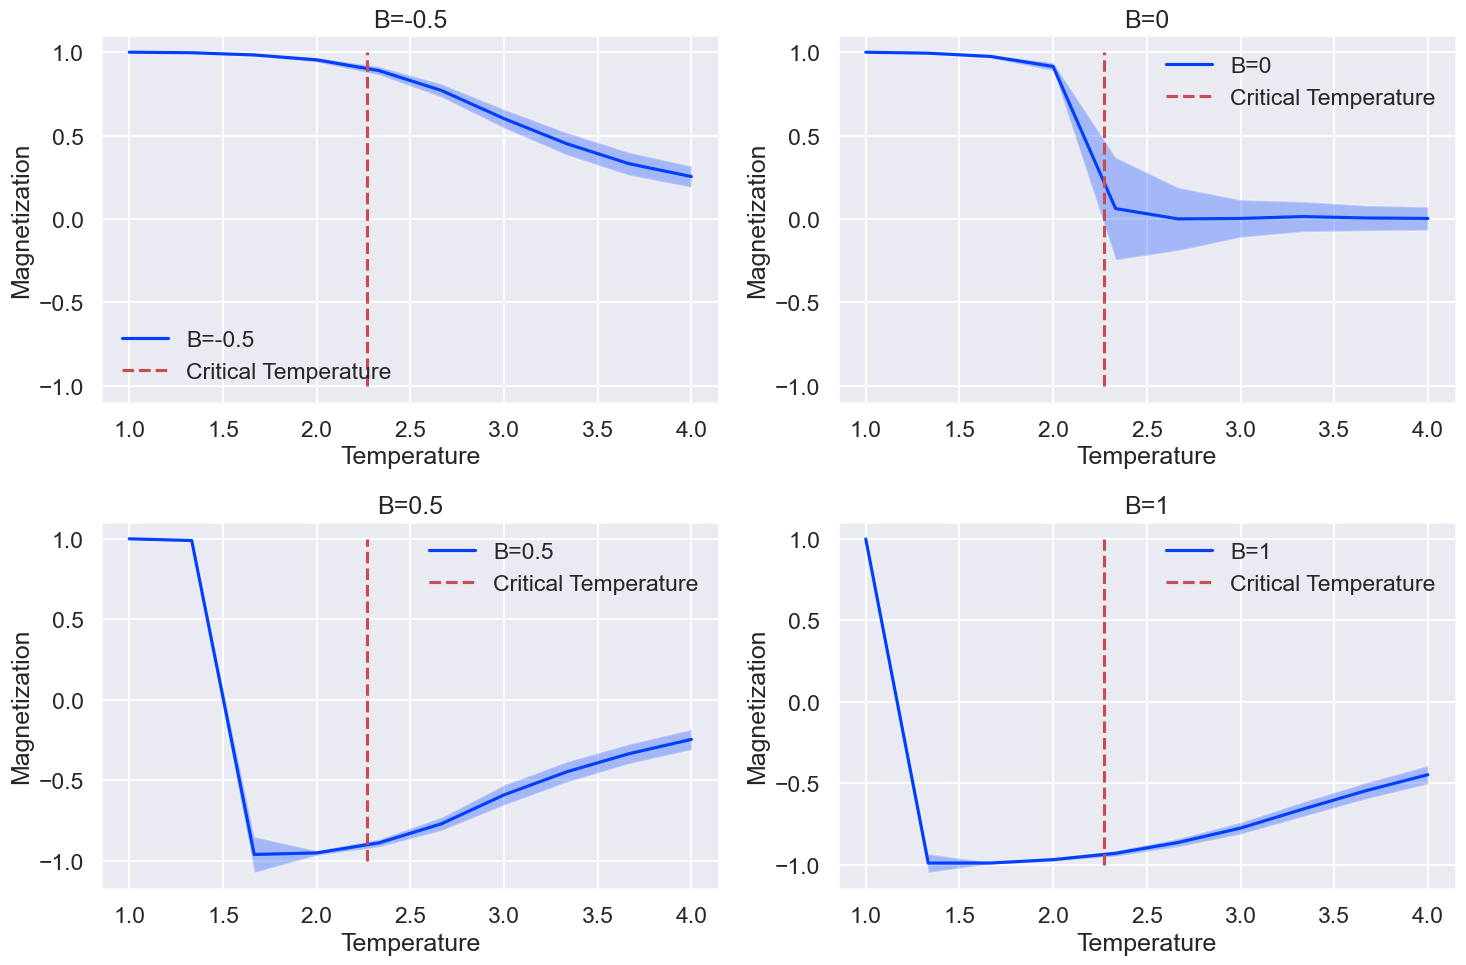

In [38]:
print("results.shape", results.shape)
plt.style.use('seaborn-v0_8-bright')
axes_shape = (len(magnetic_field)//2, len(magnetic_field)//2)
fig, ax = plt.subplots(axes_shape[0], axes_shape[1], figsize=(15, 10))
print(ax)
for i in range(len(magnetic_field)):
    curr_plot = results[:,i,0]
    std = results[:,i,1]
    row = i // axes_shape[1]  # calculate the row index
    col = i % axes_shape[1]   # calculate the column index
    ax[row, col].plot(temps, curr_plot, label=f"B={magnetic_field[i]}")
    ax[row, col].fill_between(temps, curr_plot-std, curr_plot+std, alpha=0.3)
    ax[row, col].set_xlabel("Temperature")
    ax[row, col].set_ylabel("Magnetization")
    ax[row, col].vlines(2.269, -1, 1, color='r', label="Critical Temperature", linestyles='dashed')
    ax[row, col].legend()
    ax[row, col].set_title(f"B={magnetic_field[i]}")

plt.tight_layout()
plt.show()


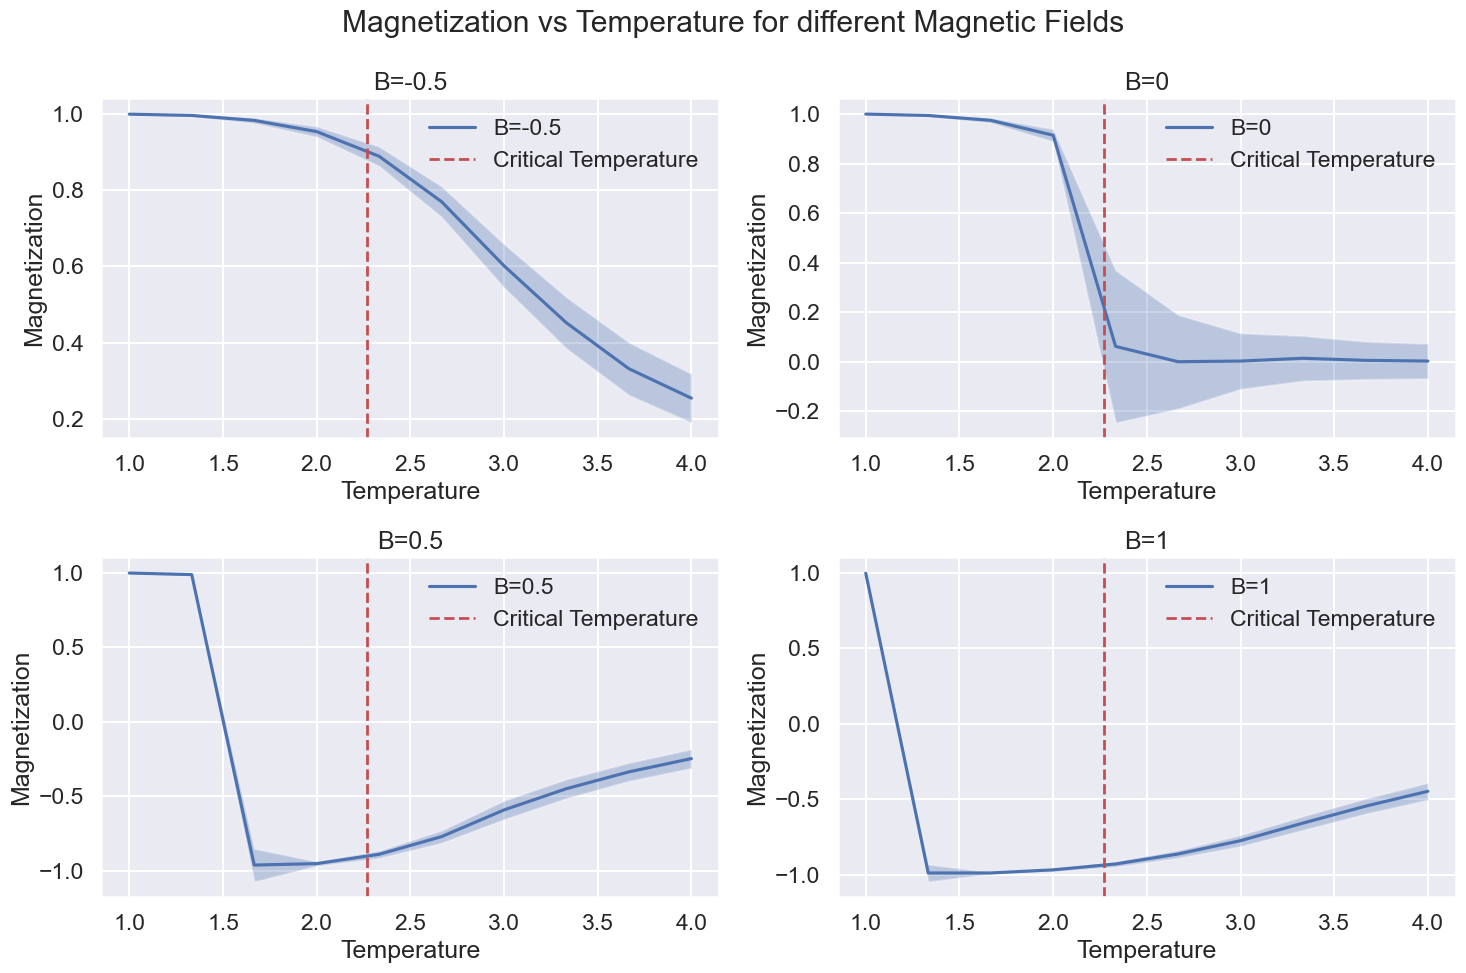

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(context='talk', style='darkgrid')

# Define the shape of the axes based on the number of magnetic field values
axes_shape = (len(magnetic_field) // 2, len(magnetic_field) // 2)

# Create subplots with specified figure size
fig, ax = plt.subplots(axes_shape[0], axes_shape[1], figsize=(15, 10))
fig.suptitle("Magnetization vs Temperature for different Magnetic Fields")

# Iterate over each subplot to populate it with data
for i in range(len(magnetic_field)):
    curr_plot = results[:, i, 0]
    std = results[:, i, 1]
    row = i // axes_shape[1]  # Row index
    col = i % axes_shape[1]   # Column index
    
    # Use Seaborn's lineplot for plotting
    sns.lineplot(x=temps, y=curr_plot, ax=ax[row, col], label=f"B={magnetic_field[i]}")
    
    # Adding the fill between using Seaborn might not be as straightforward as in Matplotlib. If needed, you can still use Matplotlib's fill_between here:
    ax[row, col].fill_between(temps, curr_plot - std, curr_plot + std, alpha=0.3)
    
    # Adding a vertical line for critical temperature
    ax[row, col].axvline(2.269, color='r', linestyle='dashed', linewidth=2, label='Critical Temperature')
    
    # Setting labels and title, Seaborn automatically handles this with the lineplot function
    ax[row, col].set_xlabel("Temperature")
    ax[row, col].set_ylabel("Magnetization")
    ax[row, col].set_title(f"B={magnetic_field[i]}")

    # Handling legends with Seaborn
    ax[row, col].legend()

# Adjust layout to prevent label/title overlap
plt.tight_layout()

# Display the plot
plt.show()


In [31]:
# temps = np.linspace(1,4,3)
temps = [0.1, 0.5, 2.269, 4]
magnetic_field = np.linspace(-2,2,16)
# magnetic_field = np.linspace(0,2,4)
# magnetic_field= [-0.5, 0, 0.5, 1]

results2 = np.array([[stats(temp, STEPS, BURNIN,N, B, display=False) for B in magnetic_field] for temp in tqdm(temps)])



  0%|          | 0/4 [00:00<?, ?it/s]

axes_shape (2, 2)


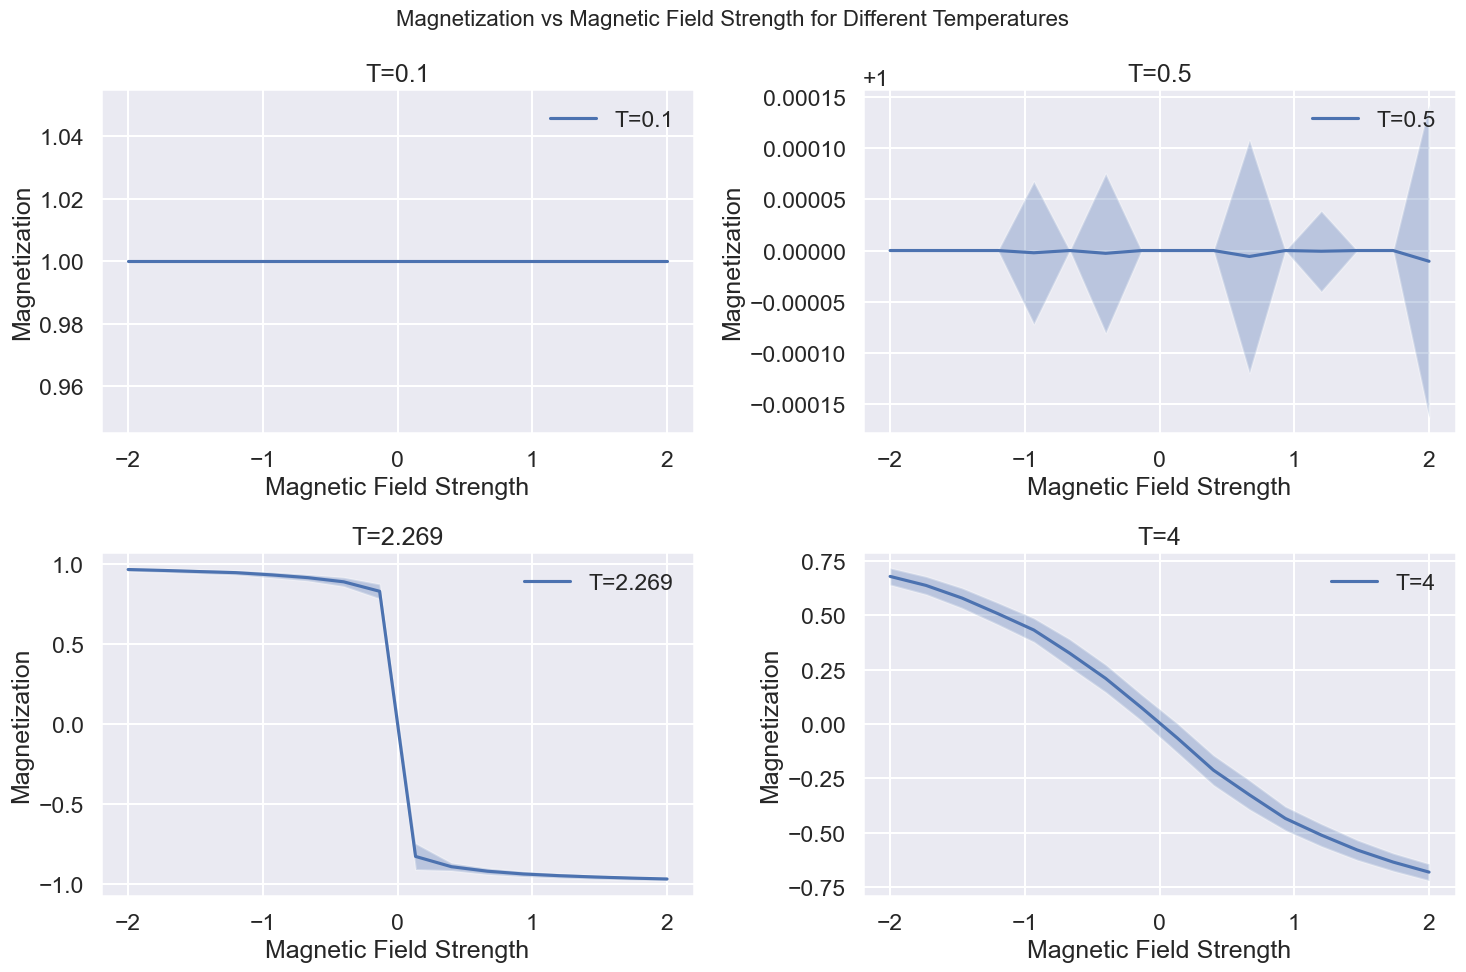

In [35]:

# Define the shape of the axes based on the number of temperature values
axes_shape = (len(temps) // 2, len(temps) // 2 if len(temps) % 2 == 0 else (len(temps) // 2) + 1)
print("axes_shape", axes_shape)

# Create subplots with specified figure size
fig, ax = plt.subplots(axes_shape[0], axes_shape[1], figsize=(15, 10))
fig.suptitle("Magnetization vs Magnetic Field Strength for Different Temperatures", fontsize=16)


# Iterate over each subplot to populate it with data
for i in range(len(temps)):
    # Assuming results is indexed [temperature, magnetic_field, [mean, std]]
    # Swap the loop to iterate over temperatures instead of magnetic fields
    curr_plot = results2[i, :, 0]
    std = results2[i, :, 1]
    row = i // axes_shape[1]  # Row index
    col = i % axes_shape[1]   # Column index

    # Use Seaborn's lineplot for plotting
    # x-axis is now magnetic field strength, and y-axis is the measured value (e.g., magnetization)
    sns.lineplot(x=magnetic_field, y=curr_plot, ax=ax[row, col], label=f"T={temps[i]}")

    # Fill between for standard deviation
    ax[row, col].fill_between(magnetic_field, curr_plot - std, curr_plot + std, alpha=0.3)
    
    # Optionally, add a vertical/horizontal line to mark a specific point, if needed
    # ax[row, col].axvline(x_value, color='r', linestyle='dashed', linewidth=2)
    
    ax[row, col].set_xlabel("Magnetic Field Strength")
    ax[row, col].set_ylabel("Magnetization")
    ax[row, col].set_title(f"T={temps[i]}")

    ax[row, col].legend()

# Adjust layout to prevent label/title overlap
plt.tight_layout()

# Display the plot
plt.show()


  0%|          | 0/20 [00:00<?, ?it/s]

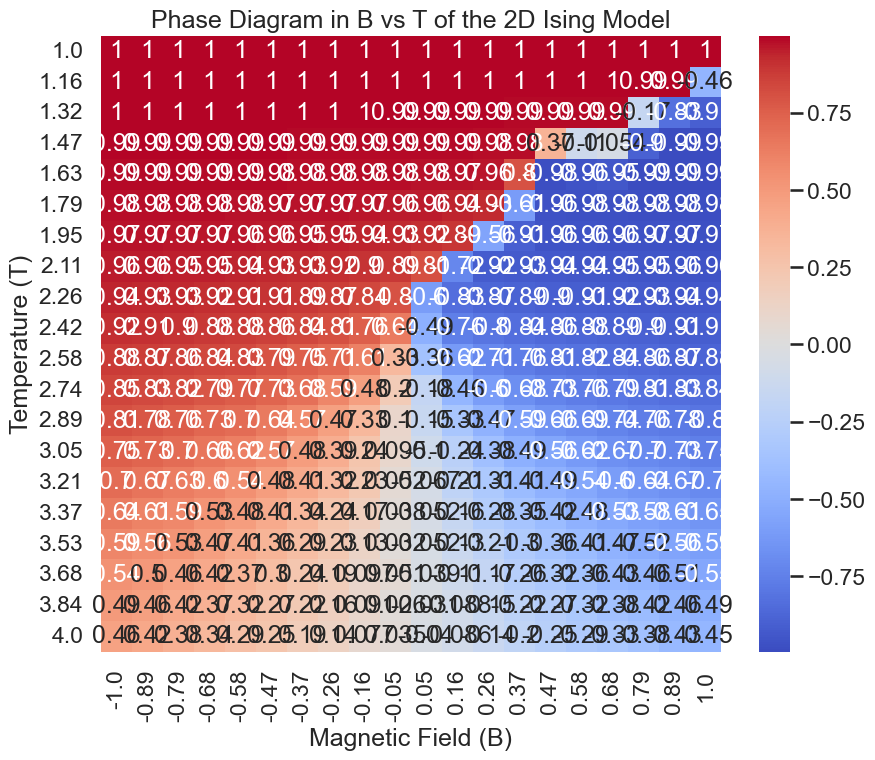

In [41]:
temps = np.linspace(1, 4, 20)  # More granular temperature range
magnetic_fields = np.linspace(-1, 1, 20)  # A range of magnetic field values

equilibrium_magnetizations = np.zeros((len(temps), len(magnetic_fields)))

# Main simulation loop to populate the equilibrium_magnetizations array
for i, temp in tqdm(enumerate(temps), total=len(temps)):
    for j, B in enumerate(magnetic_fields):
        m_mean, _ = stats(temp=temp, B=B, display=False)
        equilibrium_magnetizations[i, j] = m_mean

# Plotting the phase diagram
plt.figure(figsize=(10, 8))
sns.heatmap(equilibrium_magnetizations, xticklabels=np.round(magnetic_fields, 2), yticklabels=np.round(temps, 2), cmap='coolwarm', annot=True)
plt.title('Phase Diagram in B vs T of the 2D Ising Model')
plt.xlabel('Magnetic Field (B)')
plt.ylabel('Temperature (T)')
plt.show()


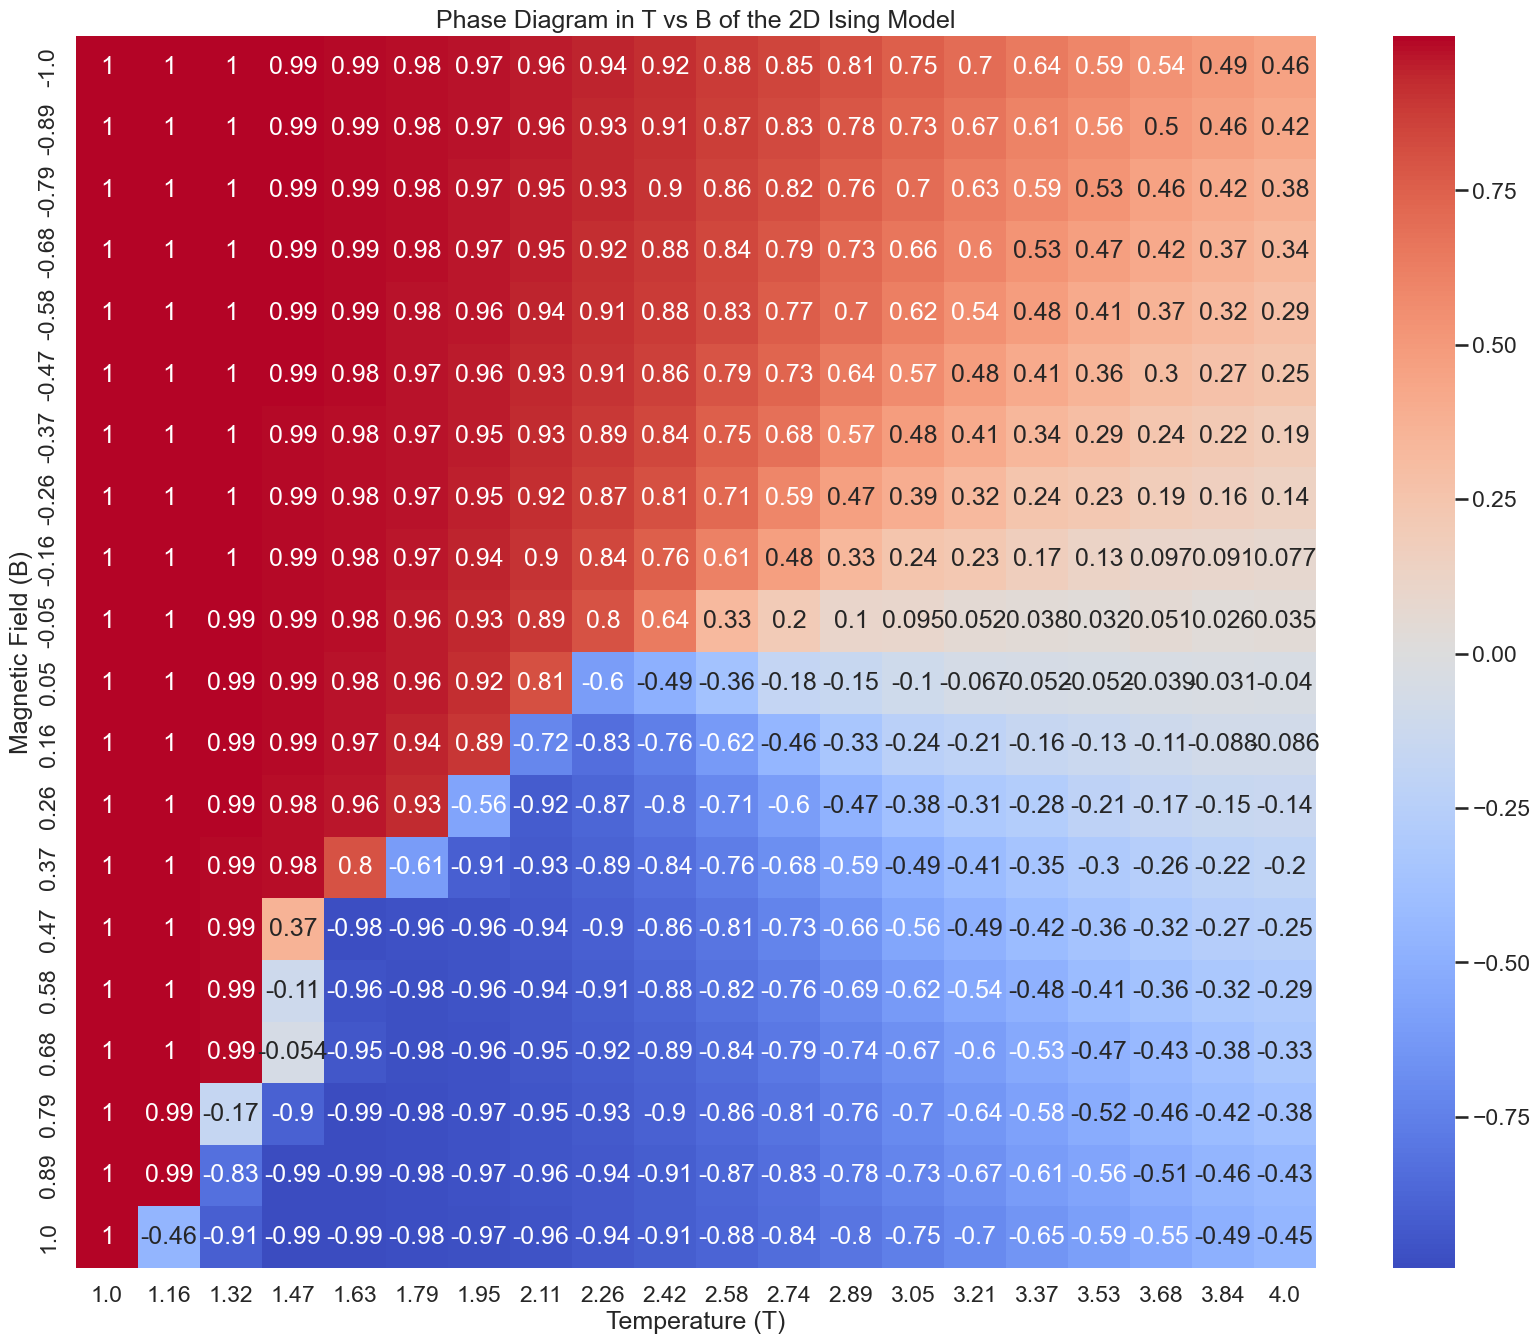

In [46]:
# Plotting the phase diagram
plt.figure(figsize=(20, 16))
sns.heatmap(np.transpose(equilibrium_magnetizations), xticklabels=np.round(temps, 2), yticklabels=np.round(magnetic_fields, 2), cmap='coolwarm', annot=True)
plt.title('Phase Diagram in T vs B of the 2D Ising Model')
plt.xlabel('Temperature (T)')
plt.ylabel('Magnetic Field (B)')
plt.show()
